In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [32]:
credit = pd.read_csv('../data/credit_applications.csv')
customers = pd.read_csv('../data/customers.csv')

In [35]:
df = pd.merge(customers, credit, on=['client_nr', 'yearmonth'], how='outer')  # You can change 'outer' to 'inner', 'left', or 'right' as needed


In [36]:
df.drop(columns=['Unnamed: 0_y'], inplace=True)

In [56]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import pandas as pd

h2o.init()
#df = df.drop(columns=['nr_credit_applications'])

# Convert pandas DataFrame to H2O Frame
h2o_df = h2o.H2OFrame(df)

# Convert target column to categorical
h2o_df['credit_application'] = h2o_df['credit_application'].asfactor()

# Train-test split
train, test = h2o_df.split_frame(ratios=[0.7], seed=42)

aml = H2OAutoML(max_models=20, seed=42, balance_classes=True, max_after_balance_size=0.5)
aml.train(y='credit_application', training_frame=train)

# Leaderboard and best model
lb = aml.leaderboard
print(lb)
best_model = aml.leader


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 mins 53 secs
H2O_cluster_timezone:,Europe/Amsterdam
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_Moaze002_o87ykn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.491 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:34:32.942: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████

In [50]:
from sklearn.metrics import classification_report

# Predict on the test dataset
predictions = aml.leader.predict(test)

# Convert predictions to a pandas DataFrame
pred_df = predictions.as_data_frame()
test_df = test.as_data_frame()

# Get the true labels and predicted labels
y_true = test_df['credit_application']  # True labels from the test dataset
y_pred = pred_df['predict']  # Predicted labels from the H2O model

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.96      0.81      0.87      8300
           1       0.15      0.48      0.23       602

    accuracy                           0.78      8902
   macro avg       0.55      0.64      0.55      8902
weighted avg       0.90      0.78      0.83      8902



/Users/Moaze002/.local/share/virtualenvs/CL_prediction-pEDheb0k/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/Moaze002/.local/share/virtualenvs/CL_prediction-pEDheb0k/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/Moaze002/.local/share/virtualenvs/CL_prediction-pEDheb0k/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/Moaze002/.local/share/virtualenvs/CL_prediction-pEDheb0k/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


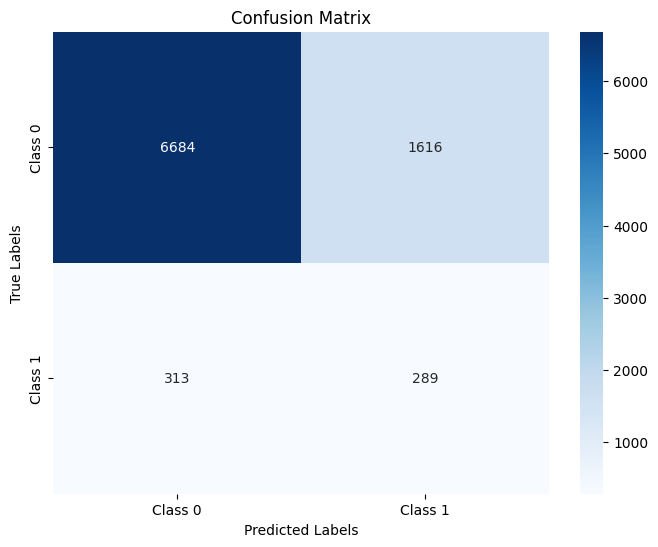

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test dataset
predictions = aml.leader.predict(test)

# Convert predictions and true labels to pandas DataFrame
pred_df = predictions.as_data_frame()
test_df = test.as_data_frame()

# Extract true labels and predicted labels
y_true = test_df['credit_application']  # True labels
y_pred = pred_df['predict']  # Predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/var/folders/4p/vxm_gd9s3gg6knrp7ccz49qc0000gn/T/ipykernel_14652/2355385254.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0], ci=None)
/var/folders/4p/vxm_gd9s3gg6knrp7ccz49qc0000gn/T/ipykernel_14652/2355385254.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0], ci=None)
/var/folders/4p/vxm_gd9s3gg6knrp7ccz49qc0000gn/T/ipykernel_14652/2355385254.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0], ci=None)
/var/folders/4p/vxm_gd9s3gg6knrp7ccz49qc0000gn/T/ipykernel_14652/2355385254.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0], ci=None)
/var/folders/4p/

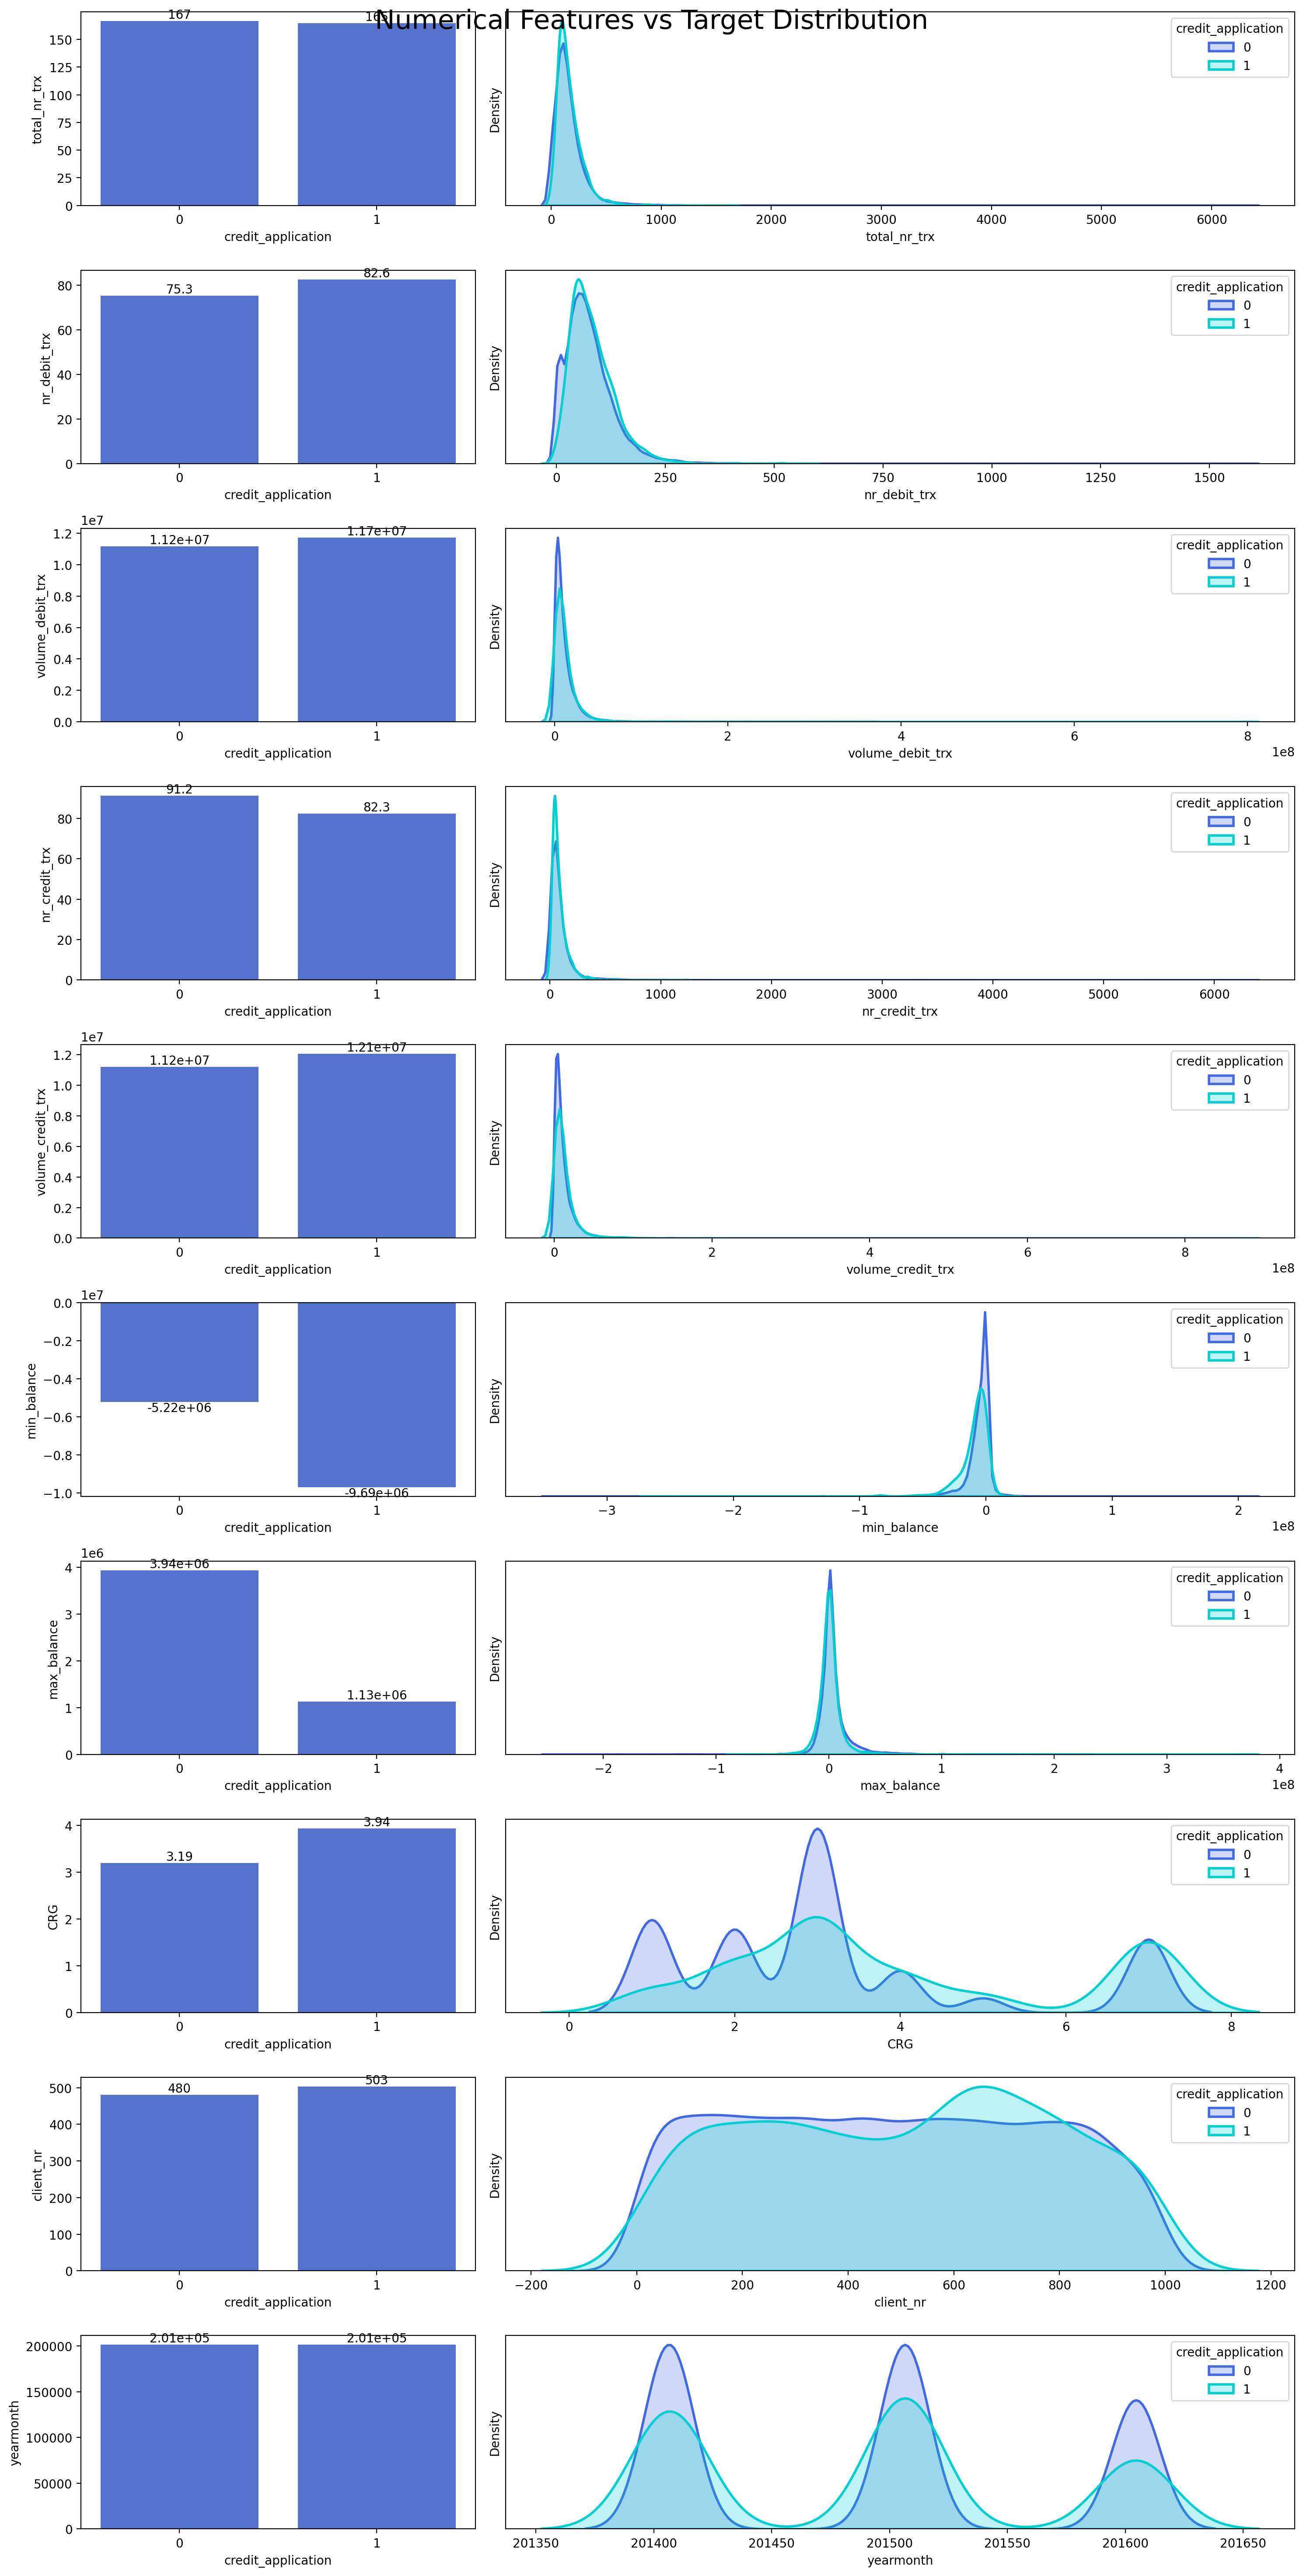

In [ ]:
# Specify the numerical features to analyze
Num_Features = [
    'total_nr_trx', 'nr_debit_trx', 'volume_debit_trx',
    'nr_credit_trx', 'volume_credit_trx', 'min_balance', 'max_balance', 'CRG',
    "client_nr"	, "yearmonth"	
]

# Define a target variable, if applicable (replace with your actual target column if exists)
Target = 'credit_application'  # Replace with relevant column name for binary target if applicable

# Set the seaborn palette
sns.set_palette(['royalblue', 'darkturquoise'])

# Create subplots
fig, ax = plt.subplots(len(Num_Features), 2, figsize=(15, len(Num_Features) * 3), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(Num_Features):
    # Barplot for numerical features against the target
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0], errorbar=None)
    
    # KDE plot for numerical feature distributions grouped by target
    sns.kdeplot(data=df[df[Target] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='0')
    sns.kdeplot(data=df[df[Target] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='1')
    
    # Clean up the right-hand plot
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title=Target, loc='upper right')
    
    # Add bar sizes to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

# Add a title and adjust layout
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

In [7]:
df.isna().sum()

Unnamed: 0_x                 0
client_nr                    0
yearmonth                    0
total_nr_trx                 0
nr_debit_trx                 0
volume_debit_trx             0
nr_credit_trx                0
volume_credit_trx            0
min_balance                  0
max_balance                  0
CRG                       5537
credit_application           0
nr_credit_applications       0
dtype: int64

In [32]:
from scipy import stats

df[stats.zscore(df['total_nr_trx'])>3]['total_nr_trx'].count()


np.int64(271)

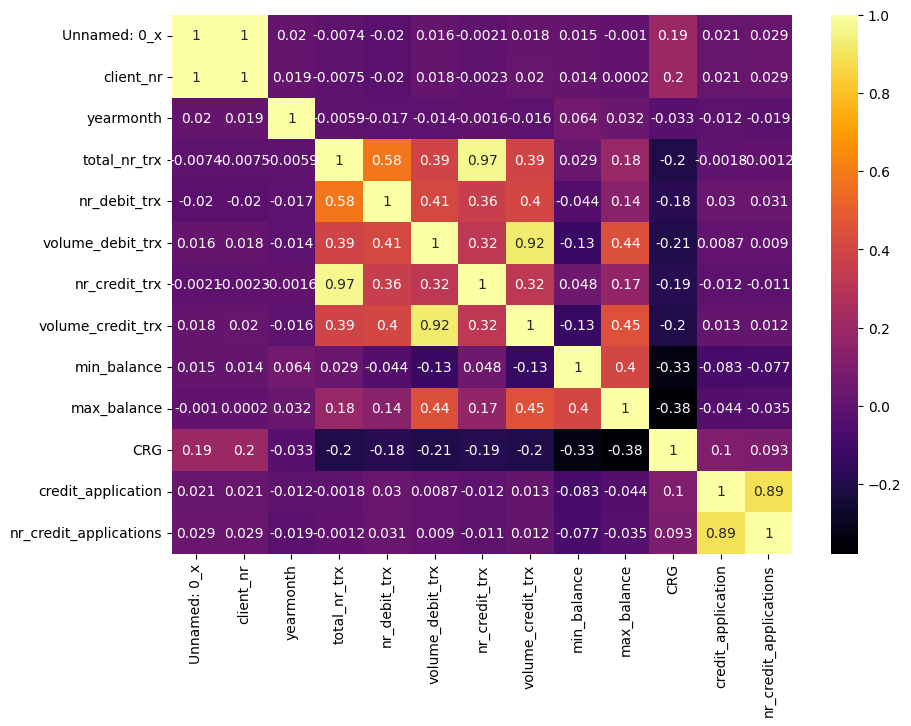

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt


# Handle outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

numeric_cols = Num_Features
data = cap_outliers(df, numeric_cols)

# Aggregate by client_nr
agg_funcs = ['mean', 'std', 'min', 'max', 'sum']
agg_data = data.groupby('client_nr').agg({col: agg_funcs for col in numeric_cols})
agg_data.columns = ['_'.join(col) for col in agg_data.columns]
agg_data['credit_application'] = df.groupby('client_nr')['credit_application'].first().values

# Train-test split
X = agg_data.drop(columns=['credit_application'])
y = agg_data['credit_application']



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the model
model = xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
model.fit(X_train, y_train)

# Predictions and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")




AUC: 0.6639880952380952


In [40]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Train the model with balanced data
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)


model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',

)



grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    verbose=1,
)

grid_search.fit(X_train_balanced, y_train_balanced)

# Best model and score
best_model = grid_search.best_estimator_
print(f"Best AUC: {grid_search.best_score_}")

# Evaluate on test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC: {auc}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best AUC: 0.5864197530864197
Test AUC: 0.5610119047619048


In [20]:
df.columns

Index(['Unnamed: 0_x', 'client_nr', 'yearmonth', 'total_nr_trx',
       'nr_debit_trx', 'volume_debit_trx', 'nr_credit_trx',
       'volume_credit_trx', 'min_balance', 'max_balance', 'CRG',
       'credit_application', 'nr_credit_applications'],
      dtype='object')

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target variable
X = df.drop(columns=['credit_application'])  # Replace 'credit_application' with your target column name
y = df['credit_application']

### 1. Handle Missing Values
# Replace missing values (NAs) with the median of each column
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

skewed_features = ['total_nr_trx',
     'volume_debit_trx', 
       'volume_credit_trx', 'min_balance', 'max_balance', 'CRG']  # List of skewed numeric feature names

### 2. Handle Skewed Distributions (Optional)
# Apply log transformation to positively skewed features (only if necessary)
#X_imputed[skewed_features] = X_imputed[skewed_features].applymap(lambda x: x if x > 0 else 1e-6)

# Create a custom FunctionTransformer for square root
#sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# Apply the transformation
#X_imputed[skewed_features] = sqrt_transformer.fit_transform(X_imputed[skewed_features])
### 3. Feature Selection Based on Distribution Overlaps
# Plot KDEs for visualization
# for col in X_imputed.columns:
#     plt.figure(figsize=(8, 4))
#     sns.kdeplot(data=X_imputed, x=col, hue=y, common_norm=False)
#     plt.title(f'Distribution of {col} by Target Variable')
#     plt.show()

# Remove low-importance or highly overlapping features manually after visual inspection
# You can replace with your own identified features
# X_selected = X_imputed.copy()
# ### 4. Check Multicollinearity
# # Compute correlation matrix
# corr_matrix = X_selected.corr()

# Drop one feature from each correlated pair based on your findings
features_to_drop = ['Unnamed: 0_x', 'nr_debit_trx', 'nr_credit_trx']  # Drop features with high correlations
X_selected = X.drop(columns=features_to_drop)


# Log the remaining features

### 5. Handle Class Imbalance
# Apply SMOTE after missing value imputation
# try:
#     smote = SMOTE(random_state=42)
#     X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#     print("SMOTE applied successfully.")
# except ValueError as e:
#     print(f"SMOTE failed due to missing values: {e}")
#     print("Proceeding without SMOTE.")

# # Alternative: Use class weights in Random Forest if SMOTE fails
# class_weights = {0: 1, 1: y.value_counts()[0] / y.value_counts()[1]}

### 6. Train-Test Split
### 6. Train-Test Split
# Use y_resampled instead of y for stratify
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

### 7. Train a Random Forest Classifier
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5588
           1       1.00      1.00      1.00       412

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

